# **Homework 4:** Automatic Differentiation and Neural Networks

### Collaborators

Please list anyone you discussed or collaborated on this assignment with below.

LIST COLLABORATORS HERE

### Course feedback

Please submit this week's course survey here: https://forms.gle/PJjGy8wrhhQnAhbb6

## Overview

In this homework we will build a tiny neural network libarary from scratch and start on an implementation of automatic differentiation!

In [1]:
# Uncomment and run if using Colab!

#import urllib.request
#remote_url = 'https://gist.githubusercontent.com/gabehope/cb9e69f642104f107f25826a0931629a/raw/163f9cf5325db28826f4103d0f168702c77dfca1/hw4_support.py'
#with urllib.request.urlopen(remote_url) as remote, open('hw4_support.py', 'w') as local:
#  [local.write(str(line, encoding='utf-8')) for line in remote]

In [2]:
# Run me first!
from hw4_support import *

#### Python features
This homework makes use of a few fancy features in Python that are worth knowing about if you are unfamiliar.
- [Variable length arguments](https://book.pythontips.com/en/latest/args_and_kwargs.html) (e.g. `*args`)
- [List comprehensions](https://book.pythontips.com/en/latest/comprehensions.html#list-comprehensions) (e.g. `[a**2 for a in range(5)]`)
- [Magic methods](https://rszalski.github.io/magicmethods/) (e.g. `__add__`)


## Part 1: Autograd

In this homework we will be using a special version of Numpy from a package called `Autograd`. Assuming it is installed (`pip install autograd`), we can import it as follows:

In [3]:
import autograd.numpy as np

This special version of Numpy behaives exactly like normal numpy. We can create and do calculations with arrays just like we would before:

In [4]:
x = np.array([3., 2., 1])
print('x:\t', x)
print('x^2:\t', x ** 2)
print('sum(x):\t', np.sum(x))

x:	 [3. 2. 1.]
x^2:	 [9. 4. 1.]
sum(x):	 6.0


However, Autograd also has a very important trick up its sleeve: it can take derivatives (and gradients) for us! This functionality can be accessed through the `grad` function. Let's start by seeing it in action with a very simple example, where we know the correct answer. The square function and its derivative can be written as:

$f(x) = x^2, \quad f'(x) = 2x$

The following code uses Autograd to compute this derivative automatically:

In [5]:
from autograd import grad

# Define a function
def f(x):
    return x ** 2

# Use 'grad' to compute the derivative function
f_prime = grad(f)

# Verify that we get the correct answer
x = 5.
print('x:\t', x)
print('f(x):\t', f(x))
print("f'(x):\t", f_prime(x))


x:	 5.0
f(x):	 25.0
f'(x):	 10.0


We can start to see how `grad` operates. `grad` takes as input a function (e.g. $f(x)$) and returns a new function that computes the derivative of $f$ at $x$. ($f'(x)$). So:

$\text{grad}(f) \longrightarrow f'$

#### Q1

Define the following function in python:

$f(x) = \log(\sin(x^3) + 3 x)$

Use `grad` to compute the derivative of $f$ at $1.5$ (i.e. compute $f'(1.5)$)

In [7]:
def f(x):
    return np.log(np.sin(x ** 3) + 2 * x)

answer = grad(f)(1.5)
print("f'(1.5)=", answer)

f'(1.5)= -1.6494948636364284


As the name would imply, `grad` can more generally be used to compute the *gradient* of a function of the form $f(\mathbf{x}): \mathbb{R}^d\rightarrow \mathbb{R}$. Remember that for a function that takes in a vector and outputs a scalar, the gradient is vector of all partial derivatives of the output with respect to each input. For example, consider a function that gives the square of the 2-norm of a vector:

$f(\mathbf{x}) = ||\mathbf{x}||^2_2 = \mathbf{x}^T\mathbf{x} = \sum_{i=1}^d x_i^2$

*Think about why these expressions are equivalent!*

As we've seen, the gradient of this function can be written as:

$\nabla f(\mathbf{x}) = 2\mathbf{x} = \begin{bmatrix}2x_1 \\ 2x_2 \\ \vdots \\ 2x_d \end{bmatrix}$

Let's see what Autograd gives us in this case:

In [8]:
# Define a function
def f(x):
    return np.sum(x ** 2)

# Use 'grad' to compute the derivative function
grad_f = grad(f)

# Verify that we get the correct answer
x = np.array([1., 2., 3])
print('x:\t', x)
print('f(x):\t', f(x))
print("f'(x):\t", grad_f(x))

x:	 [1. 2. 3.]
f(x):	 14.0
f'(x):	 [2. 4. 6.]


We see that the gradient has the same shape as the input. So the gradient function is of the form: $\mathbb{R}^d \rightarrow \mathbb{R}^d$

This makes sense as the gradient should have exactly one partial derivative for each entry in the input to the function. As discussed, this even extends beyond vectors! We could have a function that takes in any datastructure and computes the set of partial derivatives with respect to each entry.

#### Q2

Write a function that takes a `list` of vectors and computes the sum of the squared 2-norm for each vector. That is:

$f([\mathbf{a}, \mathbf{b}, \mathbf{c}...]) = ||\mathbf{a}||^2 + ||\mathbf{b}||^2 + ||\mathbf{c}||^2+...$

*Recall from above how we can compute each term in this sum!*

Then use `grad` to compute the gradient of this function with respect to the given input.

In [9]:
# Define a function
def f(x):
    '''
    Compute the sum of squared 2-norms for a list of vectors

    Args:
        x (list of arrays): A list of 1-dimensional arrays
    Returns:
        output (float): The result
    '''
    s = 0.
    for xi in x:
        s += np.dot(xi, xi)
    return s

# Use 'grad' to compute the derivative function
grad_f = grad(f)

# Verify that we get the correct answer
x = [np.array([1., 2., 3]), np.array([7., 2.]), np.array([6.])]
print('x:\t', x)
print('f(x):\t', f(x))
print("f'(x):\t", grad_f(x))

x:	 [array([1., 2., 3.]), array([7., 2.]), array([6.])]
f(x):	 103.0
f'(x):	 [array([2., 4., 6.]), array([14.,  4.]), array([12.])]


A useful argument that we can give to `grad` is `argnum`. If our function takes more than one argument `argnum` lets us specify which one to take the gradient with respect to. For example, if we have the function:

$f(x, y) = x^2y$

Then:

$f'_x(x,y)=2xy, \quad f'_y(x, y)=x^2$

In [10]:
def f(x, y):
    return x ** 2 * y

print('f(3, 5) = ', f(3., 5.))

df_dx = grad(f, argnum=0)(3., 5.)
df_dy = grad(f, argnum=1)(3., 5.)

print('df_dx = ', df_dx)
print('df_dy = ', df_dy)

f(3, 5) =  45.0
df_dx =  30.0
df_dy =  9.0


## Part 2: Implementing a neural network

Now that we have everything we need to apply automatic differentiation to train a neural network!

Before we do that though, let's try out our automatic differentiation for logistic regression. Below is a slight modification of LogisticRegression implementation we saw in the last homework.

In [25]:

def sigmoid(x):
    # Computes the sigmoid function
    return 1. / (1. + np.exp(-x))

class LogisticRegression:
    def __init__(self, dims):
        '''
        Args:
            dims (int): d, the dimension of each input
        '''
        self.weights = np.zeros((dims + 1, 1))

    def prediction_function(self, X, w):
        '''
        Get the result of our base function for prediction (i.e. x^t w)

        Args:
            X (array): An N x d matrix of observations.
            w (array): A (d+1) x 1 vector of weights.
        Returns:
            pred (array): A length N vector of f(X).
        '''
        X = np.pad(X, ((0,0), (0,1)), constant_values=1., mode='constant')
        return np.dot(X, w)

    def predict(self, X):
        '''
        Predict labels given a set of inputs.

        Args:
            X (array): An N x d matrix of observations.
        Returns:
            pred (array): An N x 1 column vector of predictions in {0, 1}
        '''
        return (self.prediction_function(X, self.weights) > 0)
    
    def predict_probability(self, X):
        '''
        Predict the probability of each class given a set of inputs

        Args:
            X (array): An N x d matrix of observations.
        Returns:
            probs (array): An N x 1 column vector of predicted class probabilities
        '''
        return sigmoid(self.prediction_function(X, self.weights))

    def accuracy(self, X, y):
        '''
        Compute the accuracy of the model's predictions on a dataset

        Args:
            X (array): An N x d matrix of observations.
            y (array): A length N vector of labels.
        Returns:
            acc (float): The accuracy of the classifier
        '''
        y = y.reshape((-1, 1))
        return (self.predict(X) == y).mean()

    def nll(self, X, y, w=None):
        '''
        Compute the negative log-likelihood loss.

        Args:
            X (array): An N x d matrix of observations.
            y (array): A length N vector of labels.
            w (array, optional): A (d+1) x 1 matrix of weights.
        Returns:
            nll (float): The NLL loss
        '''
        if w is None:
            w = self.weights

        y = y.reshape((-1, 1))
        xw = self.prediction_function(X, w)
        py = sigmoid((2 * y - 1) * xw)
        return -(np.log(py)).sum()
    
    def nll_gradient(self, X, y):
        '''
        Compute the gradient of the negative log-likelihood loss.

        Args:
            X (array): An N x d matrix of observations.
            y (array): A length N vector of labels.
        Returns:
            grad (array): A length (d + 1) vector with the gradient
        '''
        y = y.reshape((-1, 1))
        xw = self.prediction_function(X, self.weights)
        py = sigmoid((2 * y - 1) * xw)
        grad = ((1 - py) * (2 * y - 1)).reshape((-1, 1)) * np.pad(X, [(0,0), (0,1)], constant_values=1.)
        return -np.sum(grad, axis=0)
    
    def nll_and_grad_no_autodiff(self, X, y):
        # Compute nll_and_grad without automatic diferentiation
        return self.nll(X, y), self.nll_gradient(X, y)


#### Q3 
Write the method `nll_and_grad` for the LogisticRegression class using the `grad` function from Autograd. Verify that it gives a similar answer to `nll_and_grad_no_autodiff`.

***Hint:** Note that the `nll` function can optionally take in the parameters. You can use this functionality and the `argnum` argument of `grad` in your answer. You can assume that `self` refers to the model object, so you can access the weights via `self.weights`*

In [26]:
def nll_and_grad(self, X, y):
    loss = self.nll(X, y, self.weights)
    grads = grad(self.nll, argnum=2)(X, y, self.weights)
    return loss, grads

LogisticRegression.nll_and_grad = nll_and_grad

This implementation quite inefficient (we'll fix this in the future!), so we'll test our model on a very small dataset.

Loss 25.74, accuracy: 0.88: 100%|██████████| 250/250 [00:00<00:00, 1484.06it/s]


Model accuracy: 0.880


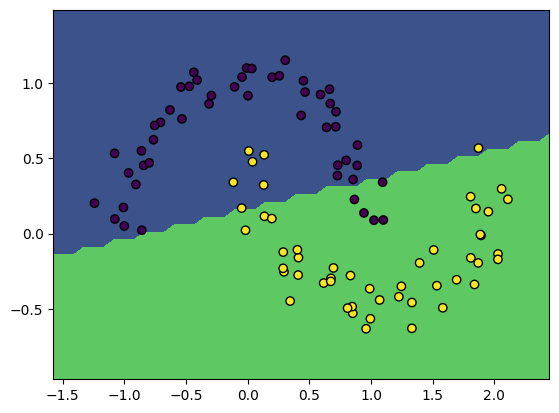

In [27]:
X, y = make_moons(100, noise=0.1)
model = LogisticRegression(2)
gradient_descent(model, X, y, lr=3e-2, steps=250)

print('Model accuracy: %.3f' % model.accuracy(X, y))
plot_boundary(model, X, y)

Now let's extend our model to be a neural network! We'll create a neural network class that extends our logistic regression class. First we'll setup the needed weight matrices.

#### Q4
Fill in the Neural Network `__init__` method below. The method should take in the input data dimension and a list of integers specifying the size of each hidden layer (the number of neurons in each layer). The function should create a list of numpy arrays of the appropriate shapes for the weight matrices. 

For example if `dims` is `2` and `hidden_sizes` is `[4, 4]`, then `self.weights` should have 3 entries of shapes `[(4x2), (4x4), (1x4)]`. This network is shown below.

<div scale=0.5><svg xmlns="http://www.w3.org/2000/svg" style="cursor: move;" viewbox="100 100 1660 899" width="600" height="400"><g transform="translate(-1450.305465592915,-694.5417988897334) scale(2.441893025338307)"><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,469.5, 846.6666666666666,429.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,469.5, 846.6666666666666,469.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,469.5, 846.6666666666666,509.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,469.5, 846.6666666666666,549.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,509.5, 846.6666666666666,429.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,509.5, 846.6666666666666,469.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,509.5, 846.6666666666666,509.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M666.6666666666666,509.5, 846.6666666666666,549.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,429.5, 1026.6666666666667,429.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,429.5, 1026.6666666666667,469.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,429.5, 1026.6666666666667,509.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,469.5, 1026.6666666666667,429.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,469.5, 1026.6666666666667,469.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,469.5, 1026.6666666666667,509.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,509.5, 1026.6666666666667,429.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,509.5, 1026.6666666666667,469.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,509.5, 1026.6666666666667,509.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,549.5, 1026.6666666666667,429.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,549.5, 1026.6666666666667,469.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,549.5, 1026.6666666666667,509.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M1026.6666666666667,429.5, 1206.6666666666667,489.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M1026.6666666666667,469.5, 1206.6666666666667,489.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M1026.6666666666667,509.5, 1206.6666666666667,489.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,429.5, 1026.6666666666667,549.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,469.5, 1026.6666666666667,549.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,509.5, 1026.6666666666667,549.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M846.6666666666666,549.5, 1026.6666666666667,549.5"></path><path class="link" style="stroke-width: 0.5px; stroke-opacity: 1; stroke: rgb(80, 80, 80); fill: none;" marker-end="" d="M1026.6666666666667,549.5, 1206.6666666666667,489.5"></path><circle r="10" class="node" id="0_0" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="666.6666666666666" cy="469.5"></circle><circle r="10" class="node" id="0_1" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="666.6666666666666" cy="509.5"></circle><circle r="10" class="node" id="1_0" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="846.6666666666666" cy="429.5"></circle><circle r="10" class="node" id="1_1" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="846.6666666666666" cy="469.5"></circle><circle r="10" class="node" id="1_2" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="846.6666666666666" cy="509.5"></circle><circle r="10" class="node" id="1_3" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="846.6666666666666" cy="549.5"></circle><circle r="10" class="node" id="2_0" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="1026.6666666666667" cy="429.5"></circle><circle r="10" class="node" id="2_1" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="1026.6666666666667" cy="469.5"></circle><circle r="10" class="node" id="2_2" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="1026.6666666666667" cy="509.5"></circle><text class="text" dy=".35em" style="font-size: 12px;" x="631.6666666666666" y="589.5">Input Layer ∈ ℝ²</text><text class="text" dy=".35em" style="font-size: 12px;" x="811.6666666666666" y="589.5">Hidden Layer ∈ ℝ⁴</text><text class="text" dy=".35em" style="font-size: 12px;" x="991.6666666666667" y="589.5">Hidden Layer ∈ ℝ⁴</text><circle r="10" class="node" id="2_3" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="1026.6666666666667" cy="549.5"></circle><circle r="10" class="node" id="3_0" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);" cx="1206.6666666666667" cy="489.5"></circle><text class="text" dy=".35em" style="font-size: 12px;" x="1171.6666666666667" y="589.5">Output Layer ∈ ℝ¹</text></g><defs><marker id="arrow" viewBox="0 -5 10 10" markerWidth="7" markerHeight="7" orient="auto" refX="40"><path d="M0,-5L10,0L0,5" style="stroke: rgb(80, 80, 80); fill: none;"></path></marker></defs></svg>

If you find it easier you could also define the weights in terms of $W^T$ instead, in which case the shapes would be: `[(2x4), (4x4), (4x1)]`. You could also consider how to add a bias term at each layer as in logistic regression (but this isn't nessecary for full credit).

The values in each array should be drawn from a normal distribution with standard deviation 1. You can create such a matrix in numpy using:

```
np.random.normal(scale=1., size=shape)
```

In [28]:
class NeuralNetwork(LogisticRegression):
    def __init__(self, dims, hidden_sizes=[]):
        self.weights = [1. * np.random.normal(scale=1., size=(i + 1, o)) for (i, o) in zip([dims] + hidden_sizes, hidden_sizes + [1])]

test_nn_constructor(NeuralNetwork)

Passed!


Recall that for logistic regression the prediction function (before threholding or sigmoid) was $\mathbf{X}\mathbf{w}$. We now want to implement the prediction function for our neural network class. This function should perform the appropriate feature transforms and multiply by the regression weights. For a neural network with a single hidden layer this will look like:

$f(\mathbf{X}) = \sigma(\mathbf{X}\mathbf{W}_1^T)\mathbf{w}_0$

Use the **sigmoid** activation function for this problem.

For multiple layers we can also think of this a a **chain** of feature transforms:
$$\Phi_1 = \sigma(\mathbf{X}\mathbf{W}_1^T)$$
$$\Phi_2 = \sigma(\Phi_1 \mathbf{W}_2^T)$$
$$...$$
$$\Phi_l = \sigma(\Phi_{l-1} \mathbf{W}_l^T)$$
$$f(\mathbf{X}) = \Phi_l\mathbf{w}_0$$
Where $\Phi_i$ is just the variable that represents the neurons at layer $i$ (the result of the first $i$ transforms applied to $\mathbf{X}$).


#### Q5 
Implement the prediction function as described above. Note that the prediction function should use the weights passed into the `w` argument rather than `self.weights`, this will make it easier to implement the next question.

***Hint:** Note that this function should **not** apply a final sigmoid or thresholding, instead it should be the equivalent of `linear_function` from the previous homework*


In [29]:
def prediction_function(self, X, w):
    '''
    Get the result of our base function for prediction (i.e. x^t w)

    Args:
        X (array): An N x d matrix of observations.
        w (list of arrays): A list of weight matrices
    Returns:
        pred (array): An N x 1 matrix of f(X).
    '''
    for wi in w[:-1]:
        X = sigmoid(LogisticRegression.prediction_function(self, X, wi))
    pred = LogisticRegression.prediction_function(self, X, w[-1])
    return pred.reshape((-1, 1))

NeuralNetwork.prediction_function = prediction_function
test_nn_prediction_function(NeuralNetwork)

Passed!


#### Q6
Implement an `nll_and_grad` method for the `NeuralNetwork` class using Autograd to compute the gradient with respect to each weight matrix.

***Hint:** If you use `np.pad` anywhere in your implementation, Autograd may complain if you don't include the keyword argument `mode='constant'`*

In [30]:
def nll_and_grad(self, X, y):
    '''
    Get the negative log-likelihood loss and its gradient

    Args:
        X (array): An N x d matrix of observations.
        y (array): A length N vector of labels
    Returns:
        nll (float): The negative log-likelihood
        grads (list of arrays): A list of the gradient of the nll with respect
                                to each value in self.weights.
    '''
    loss = self.nll(X, y, self.weights)
    grads = grad(self.nll, argnum=2)(X, y, self.weights)
    return loss, grads

NeuralNetwork.nll_and_grad = nll_and_grad

We now have everything in place to train a neural network from scratch! Let's try it on our tiny dataset. Feel free to change the inputs.

***Hint**: If this give very poor results and/or runs very slowly, make sure to carefully check the shape of each operation in your code to make sure it matches your expectation.*

Loss 28.37, accuracy: 0.86: 100%|██████████| 250/250 [00:00<00:00, 956.82it/s] 


Model accuracy: 0.860


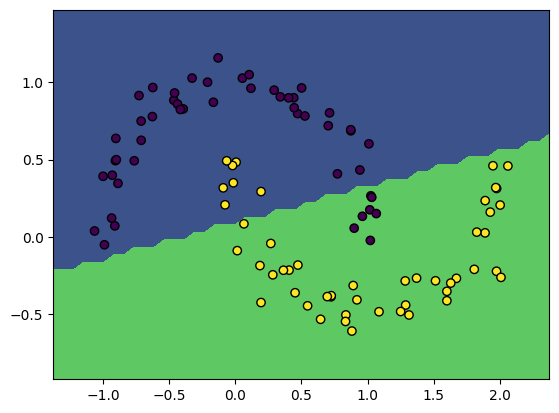

In [31]:
X, y = make_moons(100, noise=0.1)
model = NeuralNetwork(2, [5, 5])
gradient_descent(model, X, y, lr=3e-2, steps=250)

print('Model accuracy: %.3f' % model.accuracy(X, y))
plot_boundary(model, X, y)

## Part 3: Forward-mode automatic differentiation

We'll start by developing an automatic differentiation class that uses *forward-mode automatic differentiation*. 

Recall that for this version of automatic differentiaion each operation needs to keep track of the derivative of it's value with respect *each* original input. Since for every operation we need to store these extra pieces of data and functions for computing both the operation and its derivative, it makes sense to define a *class* to represent the result of an operation.

For example, if we want to make a class that represents the operation `c=a+b` our class needs several properties:
- `value`: The value of the operation (`c`)
- `forward_grads`: A dictionary that contains the derivatives with respect to each original input (e.g. ($\frac{dc}{da}$ and $\frac{dc}{db}$)).
- `func`: A function that computes the operation (`a+b`)
- `grads`: A function that *computes* the derivatives of the operation ($\frac{dc}{da}$ and $\frac{dc}{db}$)

For this homework, we've provided the outline of such a class, called `ForwardValue`. This will be the base class for all of our possible operations and represents declaring a variable with a value (`a = 5`). This is useful because it lets us define values that we might want to find derivatives with respect to.

Let's see how this will work in practice. If we want to take derivatives we will first define the inputs using `ForwardValue`.

```{python}
a = ForwardValue(5)
b = ForwardValue(2)
```
Then we can perform whatever operations we want on these inputs:
```{python}
c = a + b
L = log(c)
```
Each of these operations will produce a new `ForwardValue` object representing the result of that operation. 

As each result should maintain the derivatives with respect to each *original* inputs, we can access the final derivatives we're interested ($\frac{dL}{da}$ and $\frac{dL}{db}$) in from `L`. 

```{python}
dL_da = L.forward_grads[a]
dL_db = L.forward_grads[b]
```


We'll also be able to compute operations with non-AutogradValue numbers, but obviously won't be able to compute derivaitives with respect to these values.
```{python}
s = 4
L = s * a
dL_da = L.forward_grads[a] # Will work because a is an ForwardValue
dL_ds = L.forward_grads[s] # Will give an error because s is not an ForwardValue
```

Now that we've seen what our final product will look like, let's define our `ForwardValue` class.

In [32]:
class ForwardValue:
    '''
    Base class for automatic differentiation operations. Represents variable delcaration.
    Subclasses will overwrite func and grads to define new operations.

    Properties:
        parent_values    (list): A list of raw values of each input (as floats)
        value   (float): The value of the result of this operation
        forward_grads (dict): A dictionary mapping inputs to gradients
    '''

    def __init__(self, *args):
        self.parent_values = [arg.value if isinstance(arg, ForwardValue) else arg for arg in args]
        self.value = self.forward_pass(args)
        
        if len(self.forward_grads.keys()) == 0:
            self.forward_grads = {self: 1}
        

    def func(self, input):
        '''
        Compute the value of the operation given the inputs.
        For declaring a variable, this is just the identity function (return the input).

        Args:
            input (float): The input to the operation
        Returns:
            value (float): The result of the operation
        '''
        return input

    def grads(self, *args):
        '''
        Compute the derivative of the operation with respect to each input.
        In the base case the derivative of the identity function is just 1. (da/da = 1).

        Args:
            input (float): The input to the operation
        Returns:
            grads (tuple): The derivative of the operation with respect to each input
                            Here there is only a single input, so we return a length-1 tuple.
        '''
        return (1,)
    
    def forward_pass(self, args):
        # Calls func to compute the value of this operation 
        self.forward_grads = {}
        return self.func(*self.parent_values)
    
    def __repr__(self):
        # Python magic function for string representation.
        return str(self.value)

 


Note that in the base case, when we declare a variable the derivative with respect to itself is just 1 ($\frac{da}{da}=1$)
```{python}
da_da = a.forward_grads[a] # Will be 1
```

Now that we've defined the framework for an operation that can be used in automatic differentiation, we need to define some actual useful operations by subclassing `ForwardValue`

#### Q7
Fill out the `func` and `grads` methods of each subclass below. Recall that `func` should always return the result of the operation and `grads` should always return a `tuple` of the derivative with respect to each input.

***Hint:** Look at the `_add` and `_neg` examples as a template!*

In [33]:
class _add(ForwardValue):
    # Addition operator (a + b)
    def func(self, a, b):
        return a + b
    
    def grads(self, a, b):
        return 1., 1.
    
class _neg(ForwardValue):
    # Negation operator (-a)
    def func(self, a):
        return -a
    
    def grads(self, a):
        return (-1.,)

class _sub(ForwardValue):
    # Subtraction operator (a - b)
    def func(self, a, b):
        return a - b
    
    def grads(self, a, b):
        return 1., -1.

class _mul(ForwardValue):
    # Multiplication operator (a * b)
    def func(self, a, b):
        return a * b
    
    def grads(self, a, b):
        return b, a

class _div(ForwardValue):
    # Division operator (a / b)
    def func(self, a, b):
        return a / b
    
    def grads(self, a, b):
        return 1 / b, -a / (b * b)
    
class _exp(ForwardValue):
    # Exponent operator (e^a, or exp(a))
    def func(self, a):
        return math.exp(a)
    
    def grads(self, a):
        return (math.exp(a),)

class _log(ForwardValue):
    # (Natural) log operator (log(a))
    def func(self, a):
        return math.log(a)
    
    def grads(self, a):
        return (1 / a,)

Below, we'll define our basic functions and operators in terms of the operator classes we just wrote.

In [34]:
def exp(a):
    return _exp(a) if isinstance(a, ForwardValue) else math.exp(a)
def log(a):
    return _log(a) if isinstance(a, ForwardValue) else math.log(a)

# Note: Remember that above we defined a class for each type of operation
# so in this code we are overriding the basic operators for AutogradValue
# such that they construct a new object of the class corresponding to the
# given operation and return it. 
# (You don't need to everything that's happening here to do the HW)
ForwardValue.exp = lambda a: _exp(a)
ForwardValue.log = lambda a: _log(a)
ForwardValue.__add__ = lambda a, b: _add(a, b)
ForwardValue.__radd__ = lambda a, b: _add(b, a)
ForwardValue.__sub__ = lambda a, b: _sub(a, b)
ForwardValue.__rsub__ = lambda a, b: _sub(b, a)
ForwardValue.__neg__ = lambda a: _neg(a)
ForwardValue.__mul__ = lambda a, b: _mul(a, b)
ForwardValue.__rmul__ = lambda a, b: _mul(b, a)
ForwardValue.__truediv__ = lambda a, b: _div(a, b)
ForwardValue.__rtruediv__ = lambda a, b: _div(b, a)

We should now be able to use our `AutogradValue` objects as if they are numbers!

In [35]:
a = ForwardValue(5)
b = ForwardValue(2)

print((a + 5) * b)
print(log(b))

test_operators(ForwardValue)

20
0.6931471805599453
Passed!


We see now that our `forward_pass` method needs to update `forward_grads` (e.g. to compute $\frac{dg}{da}$ and $\frac{dg}{db}$) using the `forward_grads` values of its parents (e.g. $\frac{dc}{da}$ and $\frac{dc}{db}$)

#### Q8
Update the `forward_pass` method below for forward-mode automatic differentiation. This method should update the `foward_grads` property of the operation such that:
- `foward_grads` has an entry for every input that appears in `foward_grads` of *any* parent operation.
- If an input appears in more than 1 parent, make sure to *add* the gradients appropritately (if `g` has parents `b` and `c` then $\frac{dg}{da} = \frac{dg}{db}\frac{db}{da} + \frac{dg}{dc}\frac{dc}{da}$  )
- Parents that are not `AutogradValue` objects are ignored

If our `forward_pass` method is working correctly, we should have the following behaivior:

In [36]:
# Define our inputs as ForwardValue objects
a = ForwardValue(5)
b = ForwardValue(2)

# Perform operations
c = a * b
g = 3 * c + a


# We should have the following in the forward_grads property of c and d (note that the keys are ForwardValue objects!)
c.forward_grads = {a: 2, b: 5}  # dc/da and dc/db
g.forward_grads = {a: 3 * 2 + 1, b: 3 * 5} # dg/da = dg/dc dc/da + dg/da, dg/db = dg/dc dc/db

Implement the method below

In [41]:
def forward_pass(self, args):
    self.forward_grads = {} 
    grads = None
    for ind, node in enumerate(args):
        if hasattr(node, 'forward_grads'):
            if grads is None:
                grads = self.grads(*self.parent_values)
                self.forward_grads = {}
                
            for key, value in node.forward_grads.items():
                if key not in self.forward_grads:
                    self.forward_grads[key] = 0
                self.forward_grads[key] += value * grads[ind]
                
    # Make sure to still return the operation's value
    return self.func(*self.parent_values)

# Overwrite the AutogradValue method so that operators still work
ForwardValue.forward_pass = forward_pass
test_forward_mode(ForwardValue)

Passed!


We can now take derivates of functions!

In [42]:
a = ForwardValue(5)
b = ForwardValue(2)
L = -log(5 *b + a)

dL_da = L.forward_grads[a]
dL_db = L.forward_grads[b]
print('dL/da = %.3f, dL/db = %.3f' % (dL_da, dL_db))

dL/da = -0.067, dL/db = -0.333


We could also implement our own very simple version of Autograd's `grad`.

In [43]:
def grad(f):
    def ad_function(x, *args):
        x = ForwardValue(x)
        output = f(x, *args)
        return output.forward_grads[x]
    return ad_function

# Define a function
def f(x):
    return x * x

# Use 'grad' to compute the derivative function
f_prime = grad(f)

# Verify that we get the correct answer
x = 5.
print('x:\t', x)
print('f(x):\t', f(x))
print("f'(x):\t", f_prime(x))

x:	 5.0
f(x):	 25.0
f'(x):	 10.0


In the next homework, we'll combine our forward-mode AD implementation with our neural network class. Then we'll look at how to do automatic-differentiation more efficiently with reverse-mode AD.